In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 
from mpl_toolkits.mplot3d import Axes3D

from scipy.spatial import Delaunay
from matplotlib import gridspec

import model
import numpy as np

import stats

import bootstrap_test as bst

from scipy.interpolate import griddata


from matplotlib.colors import LogNorm

plt.rcParams['font.size'] = 8
plt.rcParams['font.weight'] = 'bold'  # NEW
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'  

In [2]:
def get_data(df, idx):
    points = []
    for (b, a), data in df.items():
        
        points.append([b, a, [data[idx][i, 100, 1] for i in range(data[idx].shape[0])]])
    return points

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

def plot_raster_imshow_from_points(points, title, vmin=None, vmax=None):
    plt.figure(figsize=(3.5, 2.5))
    x, y, z = points[:, 0], points[:, 1], points[:, 2]
    y = x - y
    x_vals = np.unique(np.round(x.astype(float), 2))
    y_vals = np.unique(np.round(y.astype(float), 2))
    z = z.reshape(x_vals.size, y_vals.size)    

    if vmin is None:
        vmin = z.min()
    if vmax is None:
        vmax = z.max()
        
    #plt.figure(figsize=(7, 6))
    img = plt.imshow(z, extent=(y_vals.min(), y_vals.max(), x_vals.min(), x_vals.max()), aspect='auto', 
                    vmin=vmin, vmax=vmax, cmap='magma')
    plt.colorbar(img)
    plt.yticks([0.1, 0.125, 0.15, 0.175, 0.2])
    plt.xticks([-0.1, -0.05, 0, 0.05, 0.1])
    plt.xlabel(r'$ \gamma $')
    plt.ylabel(r'$ \beta $')
    plt.title(title)
    plt.tight_layout()


In [4]:
df = pickle.load(open('/home/francesco/NeuronSynthesis/sim_data_fig_1.pkl', 'rb'))

In [5]:
df[(0.1, 0)][0][0, -1, :]

array([10., 46.])

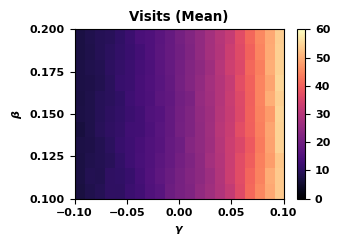

In [6]:
points = get_data(df, 0)
for p in points:
    p[-1] = np.mean(p[-1])
plot_raster_imshow_from_points(np.array(points), 'Visits (Mean)', vmin=0, vmax=60)
plt.savefig('meanZ.png', dpi=300)
plt.show()

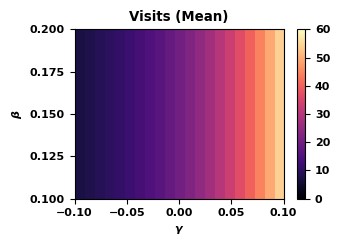

In [7]:
points = get_data(df, 0)
for p in points:
    p[-1] = model.mean_Z(10, 20, p[0], p[1])
plot_raster_imshow_from_points(np.array(points), 'Visits (Mean)', vmin=0, vmax=60)
plt.savefig('meanZTh.png', dpi=300)
plt.show()

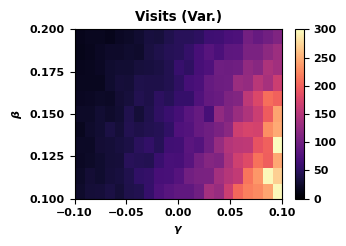

In [8]:
points = get_data(df, 0)
for p in points:
    p[-1] = np.var(p[-1])
plot_raster_imshow_from_points(np.array(points), 'Visits (Var.)', vmin=0, vmax=300)
plt.savefig('varZ.png', dpi=300)
plt.show()

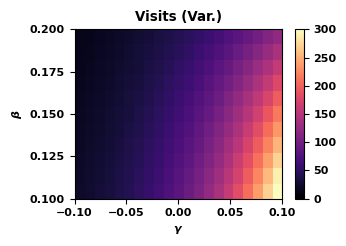

In [9]:
points = get_data(df, 0)
for p in points:
    p[-1] = model.var_Z(10, 20, 4, p[0], p[1])
plot_raster_imshow_from_points(np.array(points), 'Visits (Var.)', vmin=0, vmax=300)
plt.savefig('varZTh.png', dpi=300)
plt.show()

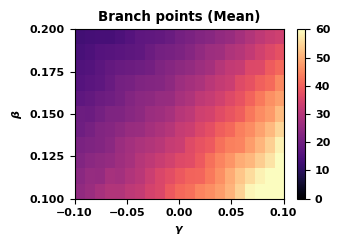

In [10]:
points = get_data(df, 1)
for p in points:
    p[-1] = np.mean(p[-1])
plot_raster_imshow_from_points(np.array(points), 'Branch points (Mean)', vmin=0, vmax=60)
plt.savefig('meanB.png', dpi=300)
plt.show()

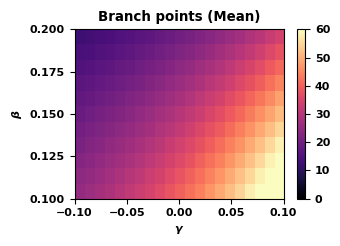

In [11]:
points = get_data(df, 1)
for p in points:
    p[-1] = model.mean_B(10, 20, p[0], p[1])
plot_raster_imshow_from_points(np.array(points), 'Branch points (Mean)', vmin=0, vmax=60)
plt.savefig('meanBTh.png', dpi=300)
plt.show()

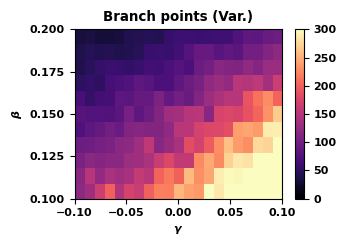

In [12]:
points = get_data(df, 1)
for p in points:
    p[-1] = np.var(p[-1])
plot_raster_imshow_from_points(np.array(points), 'Branch points (Var.)', vmin=0, vmax=300)
plt.savefig('varB.png', dpi=300)
plt.show()

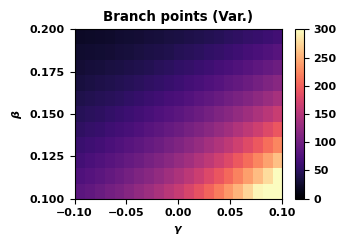

In [13]:
points = get_data(df, 1)
for p in points:
    p[-1] = model.var_B(10, 20, 4, p[0], p[1])
plot_raster_imshow_from_points(np.array(points), 'Branch points (Var.)', vmin=0, vmax=300)
plt.savefig('varBTh.png', dpi=300)
plt.show()